# TD1 

In [1]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
import string

In [2]:
# Lire les articles
with open('article1.txt', 'r') as file:
    article1 = file.read()

with open('article2.txt', 'r') as file:
    article2 = file.read()

with open('article3.txt', 'r') as file:
    article3 = file.read()

In [3]:
# Fonction de prétraitement
def preprocess(text):
    sentences = sent_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('french'))
    preprocessed_sentences = []
    
    for sentence in sentences:
        words = word_tokenize(sentence)
        words = [lemmatizer.lemmatize(word.lower()) for word in words if word.isalpha() and word.lower() not in stop_words]
        preprocessed_sentences.append(words)
    
    return preprocessed_sentences

article1_processed = preprocess(article1)
article2_processed = preprocess(article2)
article3_processed = preprocess(article3)

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Reconvertir les phrases prétraitées en chaînes de caractères
sentences1 = [" ".join(sent) for sent in article1_processed]
sentences2 = [" ".join(sent) for sent in article2_processed]

all_sentences = sentences1 + sentences2

vectorizer = TfidfVectorizer()
matrix = vectorizer.fit_transform(all_sentences)

In [10]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def find_most_similar(sentence_vectors, start_index, end_index):
    max_similarity = -np.inf
    most_similar_index = None

    for index in range(start_index, end_index):
        similarity = cosine_similarity(sentence_vectors[start_index].reshape(1, -1), sentence_vectors[index].reshape(1, -1))
        
        if similarity > max_similarity:
            max_similarity = similarity
            most_similar_index = index

    return most_similar_index, max_similarity

# Trouver la phrase la plus similaire pour chaque phrase dans l'article 1
similarities = {}
for i, sentence in enumerate(sentences1):
    similar_index, similarity = find_most_similar(matrix.toarray(), i, len(sentences1) + len(sentences2))
    similarities[sentence] = (all_sentences[similar_index], similarity)

# Récupérer la paire de phrases ayant la plus grande similarité
most_similar_pair = max(similarities.items(), key=lambda x: x[1][1])

print(f"Phrase from article 1: {most_similar_pair[0]}")
print(f"Most similar phrase from article 2: {most_similar_pair[1][0]}")
print(f"Similarity score: {most_similar_pair[1][1]}")


Phrase from article 1: tous uniquement certains antibiotiques
Most similar phrase from article 2: tous uniquement certains antibiotiques
Similarity score: [[1.]]


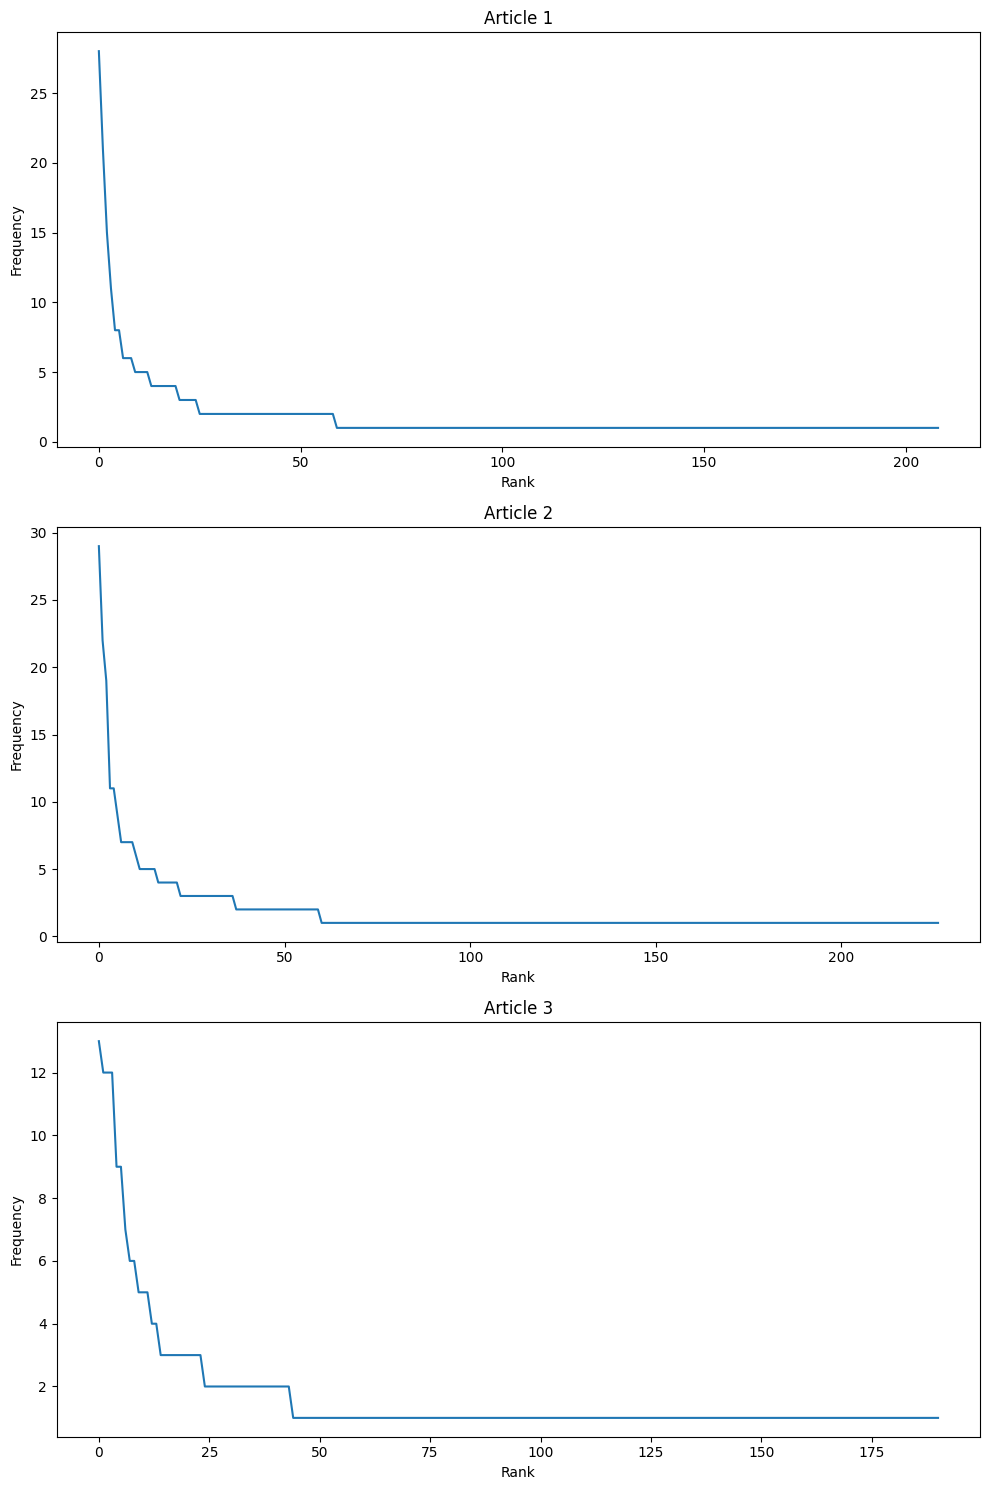

In [11]:
import matplotlib.pyplot as plt
from collections import Counter
from nltk.tokenize import word_tokenize

# Tokenisation et comptage des mots pour chaque article
word_freqs_article1 = Counter(word_tokenize(article1))
word_freqs_article2 = Counter(word_tokenize(article2))
word_freqs_article3 = Counter(word_tokenize(article3))

# Trie les mots par fréquence décroissante
sorted_freqs_article1 = sorted(word_freqs_article1.items(), key=lambda x: x[1], reverse=True)
sorted_freqs_article2 = sorted(word_freqs_article2.items(), key=lambda x: x[1], reverse=True)
sorted_freqs_article3 = sorted(word_freqs_article3.items(), key=lambda x: x[1], reverse=True)

# Préparation du subplot
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# Tracé pour l'article 1
ax[0].plot([x[1] for x in sorted_freqs_article1])
ax[0].set_title("Article 1")
ax[0].set_xlabel("Rank")
ax[0].set_ylabel("Frequency")

# Tracé pour l'article 2
ax[1].plot([x[1] for x in sorted_freqs_article2])
ax[1].set_title("Article 2")
ax[1].set_xlabel("Rank")
ax[1].set_ylabel("Frequency")

# Tracé pour l'article 3
ax[2].plot([x[1] for x in sorted_freqs_article3])
ax[2].set_title("Article 3")
ax[2].set_xlabel("Rank")
ax[2].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

In [6]:
import re
import nltk
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

# Make sure you have nltk stopwords downloaded for French
nltk.download("stopwords")
nltk.download("punkt")

# Function to preprocess French text (remove punctuation, lowercase, and stop words)
def preprocess_text_french(text):
    text = text.lower()
    text = re.sub(r'[^\w\sàâçéèêëîïôûùüÿœæÀÂÇÉÈÊËÎÏÔÛÙÜŸŒÆ]', '', text)
    words = word_tokenize(text, language="french")
    stopwords_french = set(stopwords.words("french"))
    words = [word for word in words if word not in stopwords_french]
    return words

# Function to calculate Zipf's Law statistics for a given French text
def zipf_law_french(text):
    words = preprocess_text_french(text)
    word_freq = nltk.FreqDist(words)

    # Sort word frequencies by count in descending order
    sorted_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
    return sorted_freq

def plot_zipf_law(sorted_freq):
    words, frequencies = zip(*sorted_freq)

    plt.figure(figsize=(10, 6))
    plt.bar(words, frequencies)
    plt.title("Word Frequency Distribution")
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.xticks(rotation=90)
    plt.grid(axis="y")
    plt.show()

# Three example articles in French
article1 = """VISITE DE CHARLES III EN FRANCE: PIERRE HERMÉ PRÉSENTE LE GÂTEAU QU'IL SERVIRA AU DÎNER D'ÉTAT"""

article2 = """CLe roi Charles III et la reine Camilla ont commencé leur visite en France et sont attendus pour un dîner d’Etat à Versailles ce soir """

article3 = """ HARCÈLEMENT SCOLAIRE: GABRIEL ATTAL SALUE UNE RÉPONSE "RAPIDE" APRÈS L'INTERPELLATION D'UN ÉLÈVE À ALFORTVILLE """
# Analyze Zipf's Law for each article
word_freq1 = dict(zipf_law_french(article1))
word_freq2 = dict(zipf_law_french(article2))
word_freq3 = dict(zipf_law_french(article3))

# Combine all unique words from the three articles
all_words = set(word_freq1.keys()) | set(word_freq2.keys()) | set(word_freq3.keys())

# Create vectors of word frequencies for each article
vector1 = [word_freq1.get(word, 0) for word in all_words]
vector2 = [word_freq2.get(word, 0) for word in all_words]
vector3 = [word_freq3.get(word, 0) for word in all_words]

# Calculate cosine similarity between article 1 and article 2
similarity_1_2 = cosine_similarity([vector1], [vector2])[0][0]

# Calculate cosine similarity between article 1 and article 3
similarity_1_3 = cosine_similarity([vector1], [vector3])[0][0]

# Calculate cosine similarity between article 2 and article 3
similarity_2_3 = cosine_similarity([vector2], [vector3])[0][0]

print("Cosine Similarity between Article 1 and Article 2:", similarity_1_2)
print("Cosine Similarity between Article 1 and Article 3:", similarity_1_3)
print("Cosine Similarity between Article 2 and Article 3:", similarity_2_3)

# Find the most similar pair of articles
most_similar_pair = min([(similarity_1_2, "Article 1 and Article 2"), (similarity_1_3, "Article 1 and Article 3"), (similarity_2_3, "Article 2 and Article 3")], key=lambda x: x[0])

print("\nThe most similar pair of articles is:", most_similar_pair[1])

# Analyze Zipf's Law for each article
word_freq1 = zipf_law_french(article1)
word_freq2 = zipf_law_french(article2)
word_freq3 = zipf_law_french(article3)
# Create Zipf's Law plots for each article
print("Zipf's Law analysis for Article 1:")
plot_zipf_law(word_freq1)

print("\nZipf's Law analysis for Article 2:")
plot_zipf_law(word_freq2)

print("\nZipf's Law analysis for Article 3:")
plot_zipf_law(word_freq3)

ModuleNotFoundError: No module named 'matplotlib'